# Team
- Agung Adipurwa
- Teguh
- Angelina

In [2]:
# load data
import os
import urllib.request
soal_path=os.path.join("datasets","FindIT")
download_url="https://www.kaggle.com/competitions/findit2022/data"
def fetch_data(url=download_url,path=soal_path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("predict-case.csv","sample_submission.csv","train.csv"):
        file_path=os.path.join(path,filename)
        if not os.path.isfile(file_path):
            print("Download",filename)
            urllib.request.urlretrieve(url + filename,file_path)
  


In [3]:
# download data
fetch_data()

In [4]:
# call data
import pandas as pd
def load_soal_data(name,path=soal_path):
    csv_path=os.path.join(path,name)
    return pd.read_csv(csv_path, delimiter='|')

In [5]:
predict_case=load_soal_data("predict-case.csv")
sample_sibmission=load_soal_data("sample_submission.csv")
train_data=load_soal_data("train.csv")

In [6]:
print(predict_case.shape)
print(sample_sibmission.shape)
print(train_data.shape)

(3000, 14)
(3000, 1)
(31746, 15)


salary                  25394
company_process_time     9144
job_benefits             6667
company_size             5163
experience_level         4292
company_industry         1514
employment_type          1344
salary_currency             4
job_description             1
id                          0
job_title                   0
location                    0
career_level                0
education_level             0
job_function                0
dtype: int64


d:\Find_IT\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of Missing Value')

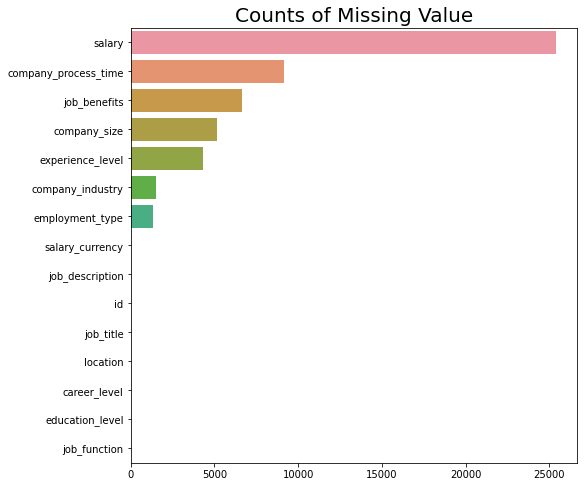

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
y = train_data.isnull().sum().sort_values(ascending=False)[:].index
x = train_data.isnull().sum().sort_values(ascending=False)[:]
print(x)
plt.figure(figsize=(8,8))
sns.barplot(x,y)
plt.title("Counts of Missing Value",size=20)


In [8]:
# cek frame
# print(train_data.head(1))
# print(predict_case.head(1))
# print(sample_sibmission.head(1))

In [9]:
# info train data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31746 entries, 0 to 31745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31746 non-null  int64  
 1   job_title             31746 non-null  object 
 2   location              31746 non-null  object 
 3   salary_currency       31742 non-null  object 
 4   career_level          31746 non-null  object 
 5   experience_level      27454 non-null  object 
 6   education_level       31746 non-null  object 
 7   employment_type       30402 non-null  object 
 8   job_function          31746 non-null  object 
 9   job_benefits          25079 non-null  object 
 10  company_process_time  22602 non-null  object 
 11  company_size          26583 non-null  object 
 12  company_industry      30232 non-null  object 
 13  job_description       31745 non-null  object 
 14  salary                6352 non-null   float64
dtypes: float64(1), int6

In [10]:
# describe train data
train_data.describe()# fak harus di convert dulu ke int karena semuanya object

,id,salary
count,31746.000000,6.352000e+03
mean,15873.500000,7.102330e+06
std,9164.425159,5.935192e+06
min,1.000000,1.000000e+01
25%,7937.250000,4.250000e+06
50%,15873.500000,5.500000e+06
75%,23809.750000,8.000000e+06
max,31746.000000,1.150000e+08


harus di convert dulu datanya menjadi numeric agar bisa di kalkulasi bestie
- convert ke numeric
- corelation field terhadap y field
- cut field yg mendekati 0
- scaling data pada x field
- Nentuin data yg mana dipakai testing and training
- model selection (anggap linear regresion)
- diskusi metode yang akan digunakan untuk training data pada linear regresion ()
    - apakah closed form (normal equstion) atau gradient descent (gdsc,sgd, dll)
- evaluasi ( repeat againt sampe mendekati sempurna)    

In [11]:
# cek predict case
print(predict_case.head(1))

      id  job_title location salary_currency  \
0  31747  Sous Chef   Lombok             IDR   

                               career_level experience_level  \
0  Pegawai (non-manajemen & non-supervisor)          8 tahun   

                                     education_level employment_type  \
0  Sertifikat Professional, D3 (Diploma), D4 (Dip...     Penuh Waktu   

                                        job_function job_benefits  \
0  Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran          NaN   

  company_process_time company_size                     company_industry  \
0                  NaN          NaN  Makanan & Minuman/Katering/Restoran   

                                     job_description  
0  Candidate must posses at least bachelor degree...  


In [12]:
print(predict_case.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    3000 non-null   int64 
 1   job_title             3000 non-null   object
 2   location              3000 non-null   object
 3   salary_currency       3000 non-null   object
 4   career_level          3000 non-null   object
 5   experience_level      2751 non-null   object
 6   education_level       3000 non-null   object
 7   employment_type       3000 non-null   object
 8   job_function          3000 non-null   object
 9   job_benefits          2251 non-null   object
 10  company_process_time  1953 non-null   object
 11  company_size          2520 non-null   object
 12  company_industry      2900 non-null   object
 13  job_description       3000 non-null   object
dtypes: int64(1), object(13)
memory usage: 328.2+ KB
None


In [13]:
# sample submmision
print(sample_sibmission.head(1))

     id,salary
0  10000,43873


In [14]:
# coba liat corelation matching y field
corelation =train_data.corr()
print(corelation["salary"].sort_values(ascending=False))
# haha 

salary    1.000000
id        0.012024
Name: salary, dtype: float64


In [15]:
kepo = train_data.drop(["id","salary"],axis=1)
print(kepo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31746 entries, 0 to 31745
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_title             31746 non-null  object
 1   location              31746 non-null  object
 2   salary_currency       31742 non-null  object
 3   career_level          31746 non-null  object
 4   experience_level      27454 non-null  object
 5   education_level       31746 non-null  object
 6   employment_type       30402 non-null  object
 7   job_function          31746 non-null  object
 8   job_benefits          25079 non-null  object
 9   company_process_time  22602 non-null  object
 10  company_size          26583 non-null  object
 11  company_industry      30232 non-null  object
 12  job_description       31745 non-null  object
dtypes: object(13)
memory usage: 3.1+ MB
None


In [16]:
# import pandas as pd
# pd.set_option("display.max_rows",None)
print(kepo["job_title"].value_counts())

Sales Executive                        273
Management Trainee                     166
Accounting Staff                       113
Sales                                  112
Sales Engineer                         101
                                      ... 
Senior Corporate Strategy Officer        1
Senior Audit (Penempatan : Jakarta)      1
Teknisi Mesin Bakery                     1
PHOTOGRAPH EDITOR                        1
Foreman Warehouse & Logistic             1
Name: job_title, Length: 19260, dtype: int64


In [17]:
print(kepo["location"].value_counts())

Jakarta Raya          7551
Jakarta Selatan       2365
Jakarta Barat         1753
Tangerang             1752
Jakarta Utara         1453
                      ... 
Belitung                 1
Sampang                  1
Tapanuli                 1
Karangasem               1
Hulu Sungai Tengah       1
Name: location, Length: 199, dtype: int64


In [18]:
print(kepo["salary_currency"].value_counts())

IDR    31731
USD       11
Name: salary_currency, dtype: int64


In [19]:
print(kepo["career_level"].value_counts())

Pegawai (non-manajemen & non-supervisor)             17566
Supervisor/Koordinator                                5943
Manajer/Asisten Manajer                               4181
Lulusan baru/Pengalaman kerja kurang dari 1 tahun     2211
Tidak Terspesifikasi                                  1399
CEO/GM/Direktur/Manajer Senior                         446
Name: career_level, dtype: int64


In [20]:
print(kepo["experience_level"].value_counts())

1 tahun                9766
2 tahun                7667
3 tahun                5113
5 tahun                2935
4 tahun                 840
10 tahun                382
7 tahun                 250
8 tahun                 220
6 tahun                 157
15 tahun                 62
12 tahun                 25
9 tahun                  11
20 tahun                  9
Lebih dari 20 Tahun       5
14 tahun                  3
16 tahun                  3
11 tahun                  2
13 tahun                  2
18 tahun                  1
17 tahun                  1
Name: experience_level, dtype: int64


In [21]:
print(kepo["education_level"].value_counts())

Sarjana (S1)                                                                                                                      10340
Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)                                                                  5504
Tidak terspesifikasi                                                                                                               5282
SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)                                                2733
SMA, SMU/SMK/STM                                                                                                                   2096
Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)                                                              2092
Sertifikat Professional, D3 (Diploma), D4 (Diploma)                                                                                1683
Sertifikat Professional, D3 (Diploma), D4 (Diplo

In [22]:
print(kepo["employment_type"].value_counts())

Penuh Waktu                 25940
Kontrak                      3846
Paruh Waktu                   272
Magang                        193
Temporer                      112
Penuh Waktu, Kontrak           35
Temporer, Magang                2
Penuh Waktu, Magang             1
Penuh Waktu, Paruh Waktu        1
Name: employment_type, dtype: int64


In [23]:
print(kepo["job_function"].value_counts())

Penjualan / Pemasaran,Penjualan Ritel                      3428
Komputer/Teknologi Informasi,IT-Perangkat Lunak            2419
Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis        2268
Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan           1990
Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR    1327
                                                           ... 
Sains,Biomedis                                               15
Lainnya,Penerbitan                                           14
Manufaktur,Kontrol Proses                                    13
Sains,Bioteknologi                                            9
Sains,Penerbangan                                             4
Name: job_function, Length: 68, dtype: int64


In [24]:
print(kepo["job_benefits"].value_counts())

Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                                          2000
Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                                       719
Asuransi kesehatan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos)                                                                                             709
Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                                                              674
Asuransi kesehatan;Bisnis (contoh: Kemeja)                                                                                                                        598
                                                                                                                                                                 ... 
Tunj

In [25]:
print(kepo["company_process_time"].value_counts())

29 days    4231
28 days    2909
27 days    1692
26 days    1632
25 days    1241
24 days    1188
21 days    1037
30 days     814
22 days     713
23 days     650
16 days     567
19 days     564
20 days     505
17 days     460
14 days     444
12 days     391
18 days     377
13 days     340
1 day       318
2 days      289
9 days      288
11 days     281
6 days      242
3 days      231
4 days      224
15 days     224
7 days      219
5 days      187
8 days      182
10 days     162
Name: company_process_time, dtype: int64


In [26]:
print(kepo["company_size"].value_counts())

51 - 200 pekerja           6931
1- 50 pekerja              4845
201 - 500 pekerja          4043
501 - 1000 pekerja         3233
2001 - 5000 pekerja        2622
Lebih dari 5000 pekerja    2594
1001 - 2000 pekerja        2315
Name: company_size, dtype: int64


In [27]:
print(kepo["company_industry"].value_counts())

Manufaktur/Produksi                                     2775
Retail/Merchandise                                      2278
Perbankan/Pelayanan Keuangan                            2090
Makanan & Minuman/Katering/Restoran                     1706
Umum & Grosir                                           1588
Komputer/Teknik Informatika (Perangkat Lunak)           1572
Produk Konsumen/Barang konsumen yang bergerak cepat     1431
Kesehatan/Medis                                         1292
Transportasi/Logistik                                   1136
Manajemen/Konsulting HR                                 1100
Pendidikan                                              1034
Konstruksi/Bangunan/Teknik                               884
Properti/Real Estate                                     872
Automobil/Mesin Tambahan Automotif/Kendaraan             734
Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)     723
Lainnya                                                  670
Agrikultural/Perkebunan/

In [28]:
print(kepo["job_description"]) # fix ni has bean slain sih 

0        Deskripsi PekerjaanRequirements :D3/SI from re...
1        Job Role: 1. Responsible for material availabi...
2        Internal Sales & AdminJob Description :We are ...
3        Job Description:Responsible for HSE implementa...
4        Overview: Our clients is manufacture for autom...
                               ...                        
31741    Key Responsibilities :Conduct audits to review...
31742    KRITERIA dan SYARATS1 Tehnik Industri, Statisi...
31743    Tanggung jawab:Mengumpulkan, menganalisa kebut...
31744    1.      Protect All Aspects of Your Source Cod...
31745    Your responsibilities:The job of an H&M Mainte...
Name: job_description, Length: 31746, dtype: object
